In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

In [19]:
df = pd.read_csv("./datasets/stores_data.csv", index_col='Store Number')

In [20]:
df.head()

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
Store Number,,,,,,
1,2100.0,Owned,Hyper,New,6.0,"45,072,000"
2,1290.0,Cooperate,Extra,New,5.0,"7,416,000"
3,500.0,Rental,Express,New,NaN,"8,592,000"
4,2000.0,Owned,Hyper,New,9.0,"48,415,500"
5,220.0,Rental,Express,Old,2.0,"3,345,500"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaStore        118 non-null    float64
 1   Property         118 non-null    object 
 2   Type             118 non-null    object 
 3   Old/New          118 non-null    object 
 4   Checkout Number  106 non-null    float64
 5   Revenue          118 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.5+ KB


In [22]:
df.shape

(118, 6)

In [23]:
# Revenue is stated as Object columns -> but have to int: lets convert it
df['Revenue'] = df['Revenue'].str.replace(',','').astype('int')

In [24]:
df.isnull().sum()

AreaStore           0
Property            0
Type                0
Old/New             0
Checkout Number    12
Revenue             0
dtype: int64

In [25]:
#checkout has 12 null values: have to replace with mean -> using SimpleImputor

In [26]:
df['Property'].unique()

array(['Owned', 'Cooperate', 'Rental', 'Owned ', 'Rental ',
       'Rental/Cooperate', 'Cooperate '], dtype=object)

In [27]:
# array(['Owned', 'Cooperate', 'Rental', 'Owned ', 'Rental ','Rental/Cooperate', 'Cooperate '], dtype=object)
# solved this issue
df['Property'] = df['Property'].str.replace('Rental ', 'Rental')

In [28]:
df['Type'].unique()

array(['Hyper', 'Extra', 'Express'], dtype=object)

In [29]:
df['Old/New'].unique()

array(['New', 'Old', 'New ', 'Old '], dtype=object)

In [30]:
df['Old/New'] = df['Old/New'].str.replace('New ', 'New')
df['Old/New'] = df['Old/New'].str.replace('Old ', 'Old')

In [38]:
df.describe()

,AreaStore,Checkout Number,Revenue
count,118.000000,106.000000,1.180000e+02
mean,1373.608136,4.792453,2.299805e+07
std,1092.453470,2.820729,2.051452e+07
min,82.000000,1.000000,2.336000e+06
25%,530.500000,3.000000,9.021375e+06
50%,1000.000000,4.000000,1.358475e+07
75%,1887.500000,6.000000,3.105050e+07
max,5600.000000,14.000000,1.000830e+08


In [ ]:
# Univarient analysis

(array([51., 20., 18.,  7., 10.,  5.,  3.,  2.,  0.,  2.]),
 array([2.33600e+06, 1.21107e+07, 2.18854e+07, 3.16601e+07, 4.14348e+07,
        5.12095e+07, 6.09842e+07, 7.07589e+07, 8.05336e+07, 9.03083e+07,
        1.00083e+08]),
 <BarContainer object of 10 artists>)

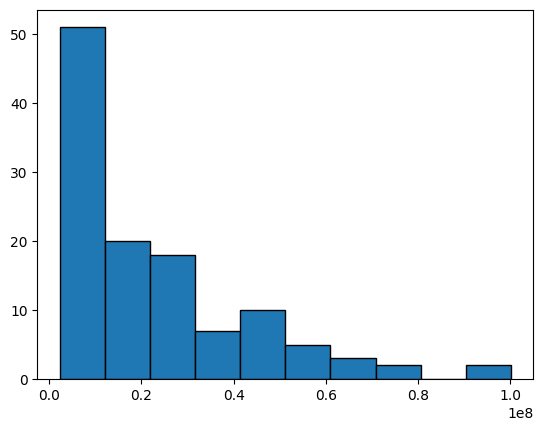

In [39]:
plt.hist(df['Revenue'], edgecolor='black')

/tmp/ipykernel_272933/3534518538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue'])


1.5338461457674408


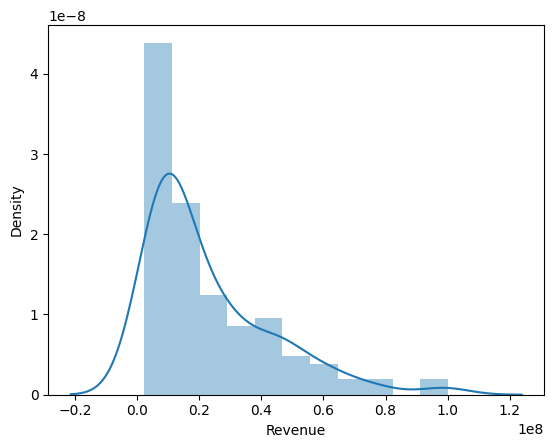

In [41]:
sns.distplot(df['Revenue'])
print(df['Revenue'].skew())

<Axes: xlabel='AreaStore', ylabel='Revenue'>

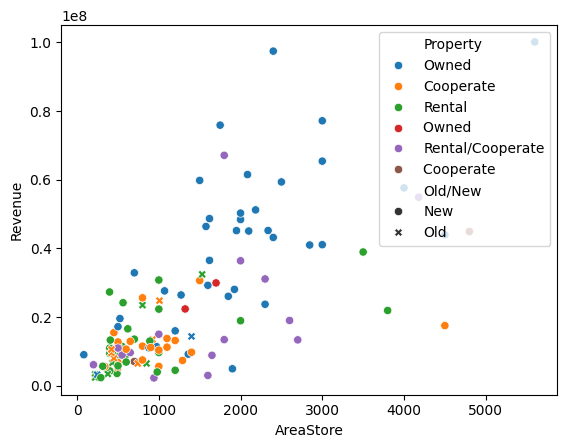

In [42]:
sns.scatterplot(x=df['AreaStore'], y=df['Revenue'], hue=df['Property'], style=df['Old/New'])

<Axes: xlabel='Old/New', ylabel='count'>

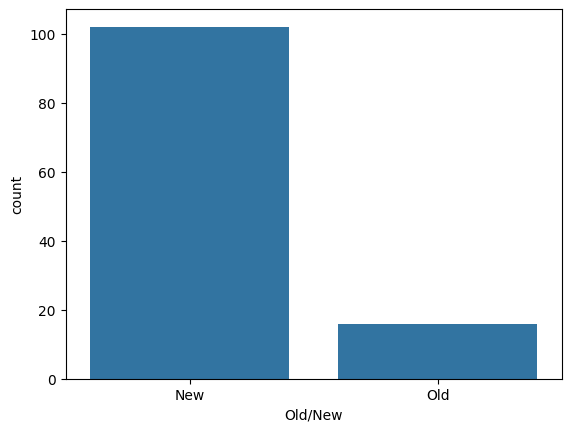

In [43]:
sns.countplot(x=df['Old/New'])

<Axes: xlabel='Type', ylabel='count'>

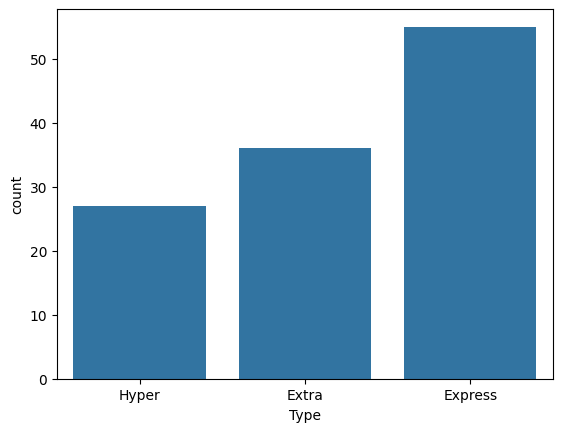

In [44]:
sns.countplot(x=df['Type'])

In [45]:
df.sample(5)

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
Store Number,,,,,,
58,500.0,Cooperate,Express,New,3.0,12795500
96,406.0,Rental,Express,New,2.0,13350000
97,600.0,Rental,Express,New,3.0,6957000
17,1000.0,Cooperate,Extra,New,3.0,5692500
92,1400.0,Owned,Extra,Old,4.0,14417500


In [ ]:
# from sklearn.impute import SimpleImputer
# null_filler = ColumnTransformer(
#     transformers=[
#         ('Checkout Number', SimpleImputer(strategy='mean'), ['Checkout Number'])
#     ],
#     remainder='drop'
# )

In [ ]:
# null_filler.fit(df)
# df['Checkout Number'] = null_filler.transform(df).reshape(-1)

In [ ]:
# Even tho im gonna drop this column but just do for testing purpose
# df.drop(columns=['Checkout Number'], inplace=True)

In [50]:
df_corr = df[['AreaStore', 'Revenue','Checkout Number']].corr()['Revenue'].reset_index()
# trick to get only columns: df.describe().columns
df_corr['skew'] = df_corr['index'].apply(lambda x : df[x].skew())
df_corr

,index,Revenue,skew
0,AreaStore,0.682994,1.560814
1,Revenue,1.000000,1.533846
2,Checkout Number,0.807730,1.259098


In [51]:
df.head()

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
Store Number,,,,,,
1,2100.0,Owned,Hyper,New,6.0,45072000
2,1290.0,Cooperate,Extra,New,5.0,7416000
3,500.0,Rental,Express,New,NaN,8592000
4,2000.0,Owned,Hyper,New,9.0,48415500
5,220.0,Rental,Express,Old,2.0,3345500


In [52]:
df['Type'].unique()

array(['Hyper', 'Extra', 'Express'], dtype=object)

In [53]:
df.isnull().sum()

AreaStore           0
Property            0
Type                0
Old/New             0
Checkout Number    12
Revenue             0
dtype: int64

In [ ]:
# X = df.iloc[:,0:5].values
# y = df.iloc[:, -1].values.reshape(-1,1)

In [54]:
X = df.iloc[:,0:5].values
y = df.iloc[:, -1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [55]:
X_train[0:5]

array([[1600.0, 'Rental/Cooperate', 'Extra', 'New', nan],
       [3500.0, 'Rental', 'Hyper', 'New', 11.0],
       [400.0, 'Rental', 'Express', 'New', 2.0],
       [3000.0, 'Owned', 'Hyper', 'New', 11.0],
       [1070.0, 'Owned', 'Extra', 'New', 4.0]], dtype=object)

In [ ]:
# Create pipe, that include following things
# 1. if null then set mean AreaStore and if null in property, type and Old/New set to most_frequent
#   1.1: do function transformation on areastore and Old/New
# 2. One Hot Encoding to Property, Old/New
# 3. Ordinal Encoding to Type
# 4. model training -> Linear Regression, Decision Tree

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [57]:
# for null replacing transformer
fill_null = ColumnTransformer(
    transformers=[
        ("areastore", SimpleImputer(strategy='mean'), [0]),
        ("checkout Num", SimpleImputer(strategy='mean'), [-1]),

        ("property", SimpleImputer(strategy='most_frequent'), [1]),
        ("type", SimpleImputer(strategy='most_frequent'), [2]),
        ("on", SimpleImputer(strategy='most_frequent'), [3])
    ],
    remainder='passthrough'
)

In [58]:
fill_null.fit(X_train)
fill_null.transform(X_train)[0:5]

X_train_checked = fill_null.transform(X_train)

In [59]:
from sklearn.preprocessing import FunctionTransformer

In [60]:
def myfunc(x):
    return x**2

In [61]:
log_transformer = ColumnTransformer(
    transformers=[
        ("areastore and on", FunctionTransformer(func=myfunc, validate=True), [0,1])
    ],
    remainder='drop'
)

In [62]:
# log_transformer.fit(X_train_checked)
# log_transformer.transform(X_train_checked)

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
# for one hot encoding
for_ohe = ColumnTransformer(
    transformers=[
        ('property', OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.int32), [2]),
        ('on', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first', dtype=np.int32), [-1])
    ],
    remainder='passthrough'
)

In [71]:
for_ohe.fit(fill_null.transform(X_train))
for_ohe.transform(fill_null.transform(X_train))[0:5]

array([[0, 0, 0, 0, 0, 1, 0, 1600.0, 4.861702127659575, 'Extra'],
       [0, 0, 0, 0, 1, 0, 0, 3500.0, 11.0, 'Hyper'],
       [0, 0, 0, 0, 1, 0, 0, 400.0, 2.0, 'Express'],
       [0, 0, 1, 0, 0, 0, 0, 3000.0, 11.0, 'Hyper'],
       [0, 0, 1, 0, 0, 0, 0, 1070.0, 4.0, 'Extra']], dtype=object)

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
for_oe = ColumnTransformer(
    transformers=[
        ('type', OrdinalEncoder(dtype=np.int32, categories='auto'), [-1])
    ],
    remainder='passthrough'
)

In [74]:
for_oe.fit(for_ohe.transform(fill_null.transform(X_train)))
for_oe.transform(for_ohe.transform(fill_null.transform(X_train)))[0:4]

array([[1, 0, 0, 0, 0, 0, 1, 0, 1600.0, 4.861702127659575],
       [2, 0, 0, 0, 0, 1, 0, 0, 3500.0, 11.0],
       [0, 0, 0, 0, 0, 1, 0, 0, 400.0, 2.0],
       [2, 0, 0, 1, 0, 0, 0, 0, 3000.0, 11.0]], dtype=object)

In [325]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_pipe = Pipeline(
    [
        ("Fill Null Value", fill_null),
        ("log Transformation", log_transformer),
        # ("One Hot Encode", for_ohe),
        # ("type", for_oe),
        ("DT", DecisionTreeRegressor(max_depth=3))
    ]
)

In [326]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('Fill Null Value',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('areastore', SimpleImputer(),
                                                  [0]),
                                                 ('checkout Num',
                                                  SimpleImputer(), [-1]),
                                                 ('property',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('type',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('on',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3])])),
                ('log Transformation',
                 ColumnTransformer(transformers=[('areastore and on',
                                                  FunctionTransformer(func=<function myfunc at 0x73ca7c844d30>,
                                                                      validate=True),
                                                  [0, 1])])),
                ('DT', DecisionTreeRegressor(max_depth=3))])

In [327]:
# lets optimize this pipe
df.sample(5)

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
Store Number,,,,,,
98,1600.0,Rental/Cooperate,Extra,New,NaN,3065500
80,562.0,Rental,Express,New,3.0,24214000
20,1620.0,Owned,Extra,New,6.0,36535500
87,450.0,Cooperate,Express,Old,3.0,8072000
109,900.0,Cooperate,Express,New,4.0,11198000


In [328]:
df['Type'].unique()

array(['Hyper', 'Extra', 'Express'], dtype=object)

In [329]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
X_train[1]

array([3500.0, 'Rental', 'Hyper', 'New', 11.0], dtype=object)

In [330]:
# Create pipe, that include following things
# 1. if null then set mean AreaStore and if null in property, type and Old/New set to most_frequent
#   1.1: do function transformation on areastore and Old/New
# 2. One Hot Encoding to Property, Old/New
# 3. Ordinal Encoding to Type
# 4. model training -> Linear Regression, Decision Tree

In [331]:
# preprocessor pipe
numerical = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("scaling",MinMaxScaler()),
        ("x**2 transformer", FunctionTransformer(func=np.log1p))
    ]
)

categorical_ohe = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent')),
        ("ohe",OneHotEncoder(sparse_output=False, dtype=np.int32, handle_unknown='ignore'))
    ]
)

categorical_oe = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent')),
        ("oe",OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=4))
    ]
)

In [332]:
# preprocessing columns
preprocessing_ctr = ColumnTransformer(
    transformers=[
        ("Numerical", numerical, [0, 4]),
        ("Categorical_oe", categorical_oe, [2]),
        ("Categorical_ohe", categorical_ohe, [1,3])
    ],
    remainder='passthrough'
)

In [333]:
# adding model 
lr_pipe_optimal = Pipeline(
    steps=[
        ("preprocessing", preprocessing_ctr),
        ("dt", DecisionTreeRegressor(max_depth=5))
    ]
)

In [334]:
lr_pipe_optimal

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler()),
                                                                  ('x**2 '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  [0, 4]),
                                                 ('Categorical_oe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int32'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=4))]),
                                                  [2]),
                                                 ('Categorical_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [1, 3])])),
                ('dt', DecisionTreeRegressor(max_depth=5))])

In [349]:
lr_pipe

Pipeline(steps=[('Fill Null Value',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('areastore', SimpleImputer(),
                                                  [0]),
                                                 ('checkout Num',
                                                  SimpleImputer(), [-1]),
                                                 ('property',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('type',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('on',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3])])),
                ('log Transformation',
                 ColumnTransformer(transformers=[('areastore and on',
                                                  FunctionTransformer(func=<function myfunc at 0x73ca7c844d30>,
                                                                      validate=True),
                                                  [0, 1])])),
                ('DT', DecisionTreeRegressor(max_depth=3))])

In [335]:
from sklearn.metrics import r2_score

In [336]:
lr_pipe_optimal.fit(X_train, y_train)
y_pred = lr_pipe_optimal.predict(X_test)
print(r2_score(y_pred, y_test))

0.7361875535986048


In [337]:
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print(r2_score(y_pred, y_test))

0.6680734454303814


In [338]:
X_train[0:5]

array([[1600.0, 'Rental/Cooperate', 'Extra', 'New', nan],
       [3500.0, 'Rental', 'Hyper', 'New', 11.0],
       [400.0, 'Rental', 'Express', 'New', 2.0],
       [3000.0, 'Owned', 'Hyper', 'New', 11.0],
       [1070.0, 'Owned', 'Extra', 'New', 4.0]], dtype=object)

In [339]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)

dt_pipe = Pipeline(
    [
        ("Fill Null Value", fill_null),
        ("One Hot Encode", for_ohe),
        ("type", for_oe),
        ("Decision Tree", dt)
    ]
)

In [340]:
dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('Fill Null Value',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('areastore', SimpleImputer(),
                                                  [0]),
                                                 ('checkout Num',
                                                  SimpleImputer(), [-1]),
                                                 ('property',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('type',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('on',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3])])),
                ('One Hot Encode',
                 ColumnTran...
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2]),
                                                 ('on',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [-1])])),
                ('type',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type',
                                                  OrdinalEncoder(dtype=<class 'numpy.int32'>),
                                                  [-1])])),
                ('Decision Tree', DecisionTreeRegressor(max_depth=3))])

In [341]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

rf_pipe = Pipeline(
    [
        ("Fill Null Value", fill_null),
        ("One Hot Encode", for_ohe),
        ("type", for_oe),
        ("Random Forest", rf)
    ]
)

In [342]:
rf_pipe.fit(X_train,y_train)

/home/prafull/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('Fill Null Value',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('areastore', SimpleImputer(),
                                                  [0]),
                                                 ('checkout Num',
                                                  SimpleImputer(), [-1]),
                                                 ('property',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('type',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('on',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3])])),
                ('One Hot Encode',
                 ColumnTran...
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2]),
                                                 ('on',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [-1])])),
                ('type',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type',
                                                  OrdinalEncoder(dtype=<class 'numpy.int32'>),
                                                  [-1])])),
                ('Random Forest', RandomForestRegressor())])

In [343]:
from sklearn.metrics import r2_score, mean_absolute_error
def evaluation(model, X, y):
    y_pred = model.predict(X)
    return {
        "r2_score" : r2_score(y, y_pred),
        "mae" : mean_absolute_error(y, y_pred)
    }

In [348]:
# Evaluation for Linear Regression
evaluation(lr_pipe, X_test, y_test)

{'r2_score': 0.7032031336122578, 'mae': 5721843.632018023}

In [345]:
# Evaluation for Decision Tree
evaluation(dt_pipe, X_test, y_test)

{'r2_score': 0.7595355919603982, 'mae': 5043885.126151909}

In [346]:
# Evaluation for Random Forest
evaluation(rf_pipe, X_test, y_test)

{'r2_score': 0.8046649621304606, 'mae': 4314275.388888889}

In [ ]:
# Testing some Functional Transformers here on different models

In [ ]:
df['Checkout Number'] = df['Checkout Number'].fillna(df['Checkout Number'].mean())

In [ ]:
X = df[['AreaStore', 'Checkout Number']]
y = df['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# "Using Functional Columns Transformer"
from sklearn.preprocessing import FunctionTransformer
log_tr = FunctionTransformer(func=np.log1p)

In [ ]:
log_tr.fit(X_train)

In [ ]:
X_train_log = log_tr.transform(X_train)
X_test_log = log_tr.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5)

In [ ]:
# Without function Transformation

In [ ]:
lr.fit(X_train,y_train)
dt.fit(X_train, y_train)

In [ ]:
evaluation(lr, X_test, y_test)

In [ ]:
evaluation(dt, X_test, y_test)

In [ ]:
# With Function Transformation

In [ ]:
lr.fit(X_train_log, y_train)
dt.fit(X_train_log, y_train)

In [ ]:
evaluation(lr, X_test_log, y_test)

In [ ]:
evaluation(dt, X_test_log, y_test)

In [ ]:
def myfunc(x, func=None):
    # if func==None:
    #     return x
        
    return x**2

In [ ]:
# for null replacing transformer
fill_null = ColumnTransformer(
    transformers=[
        ("areastore", SimpleImputer(strategy='mean'), [0]),
        ("checkout Num", SimpleImputer(strategy='mean'), [-1]),

        ("property", SimpleImputer(strategy='most_frequent'), [1]),
        ("type", SimpleImputer(strategy='most_frequent'), [2]),
        ("on", SimpleImputer(strategy='most_frequent'), [3])
    ],
    remainder='passthrough'
)

In [ ]:
function_transformer = ColumnTransformer(
    transformers=[
        ("areastore and on", FunctionTransformer(func=myfunc, validate=True), [0,1])
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = ColumnTransformer(
    transformers=[
        ("areastore and on", MinMaxScaler(), [0,1])
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.preprocessing import PowerTransformer
power_transformers = ColumnTransformer(
    transformers=[
        ("areastore and on", PowerTransformer(), list(range(0, 9)))
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
for_oe = ColumnTransformer(
    transformers=[
        ("type", OrdinalEncoder(dtype=np.int32), [-1])
    ],
    remainder='passthrough'
)

In [ ]:
data = df['AreaStore'].values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# kbDis = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')

kbDis_trans = ColumnTransformer(
    transformers=[
        ("areaStore_binning", KBinsDiscretizer(n_bins=10, strategy='quantile', encode='onehot-dense'), [0])
    ],
    remainder='passthrough'
)

In [ ]:
# for one hot encoding
for_ohe = ColumnTransformer(
    transformers=[
        ('property', OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int32), [-3]),
        ('on', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first', dtype=np.int32), [-1])
    ],
    remainder='passthrough'
)

In [ ]:
# power_transformers.fit_transform(for_oe.fit_transform(for_ohe.fit_transform(fill_null.fit_transform(X))))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_pipe = Pipeline(
    [
        ("Fill Null Value", fill_null),
        # ("Binning Transformer", kbDis_trans),
        ("One Hot Encode", for_ohe),
        ("type", for_oe),
        ("power transformers", power_transformers),
        # ("Function Transformation", function_transformer),
        # ("MinMax scaling", scale),
        ("LinearRegression", lr)
        # ("DecisionTree", dt),
        # ("Random Forest", rf)
    ]
)

In [ ]:
X = df.iloc[:,0:5].values
y = df.iloc[:, -1].values.reshape(-1,1)


# max = [-1,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

lr_pipe.fit(X_train, y_train)

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    lr_pipe.fit(X_train, y_train)
    
    r2 = evaluation(lr_pipe, X_test, y_test)['r2_score']
    if r2 > max[0]:
        max[0] = r2
        max[1] = i
    # print(r2)
max

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)
lr_pipe.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_validate
np.mean(cross_validate(estimator=lr_pipe, X=X, y=y, scoring='r2', cv=10)['test_score'])

In [ ]:
rf

In [ ]:
import time
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=49)
lr_pipe.fit(X_train, y_train)
print(evaluation(lr_pipe, X_test, y_test))

time.time() - start

In [ ]:
# Function Tranformaer : 
# 1. x**2 : {'r2_score': 0.8751736647851673, 'mae': 7253804.382525623} i=7
# 2. x : {'r2_score': 0.8422173811424614, 'mae': 8193476.665901825} i=7
# 3. log1p: log(x+1): {'r2_score': 0.8422173811424614, 'mae': 8193476.665901825} i=38
# 4. 1/x: {'r2_score': 0.6030002523965985, 'mae': 6700360.377678727} i=23
# 5. x*(1/2): {'r2_score': 0.8422173811424614, 'mae': 8193476.665901825} i=7
# 6. yeo-johnson: {'r2_score': 0.7333781800482977, 'mae': 7817212.318339848} i=83, using all columns and decision tree {'r2_score': 0.9186446852666847, 'mae': 3485888.3093149546} i=49
# 7. box-cox : {'r2_score': 0.7341214395157462, 'mae': 7816825.910100732} i=83 after using all columns with random forest[0.8695621502571076, 33] 


In [ ]:
lr_pipe

In [ ]:
df[['AreaStore','Checkout Number']].describe()

In [ ]:
df['AreaStore'].skew()
df['Checkout Number'].skew()

In [ ]:
sns.distplot(scaler.fit_transform(df['AreaStore'].values.reshape(-1,1)), hist=False)
sns.distplot(scaler.fit_transform(df['Checkout Number'].values.reshape(-1,1)), hist=False)